In [ ]:
# Code to mount google drive to load the data file saved in google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# Loading data from csv file
import pandas as pd
data_path = '/gdrive/MyDrive/Project/codon_usages.csv'


#read the data from CSV file
df = pd.read_csv(data_path)


#check data has been imported in df or not
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,arc,0,270161,8652,Pyrobaculum spherical virus,0.02566,0.01537,0.01202,0.02658,0.02161,...,0.00682,0.00636,0.02554,0.01479,0.02612,0.01156,0.03849,0.00266,0.00150,0.00162
1,arc,0,285013,21412,Sulfolobus virus STSV1,0.02676,0.01471,0.03610,0.01508,0.02134,...,0.00079,0.01770,0.01055,0.03461,0.01205,0.04231,0.02144,0.00187,0.00056,0.00103
2,arc,0,292639,6182,Thermoproteus tenax spherical virus 1,0.01553,0.01973,0.00679,0.02993,0.01003,...,0.00550,0.00469,0.01828,0.00971,0.02491,0.01634,0.02232,0.00372,0.00065,0.00178
3,arc,0,425386,5812,Pyrococcus abyssi virus 1,0.01824,0.03097,0.00671,0.01669,0.03011,...,0.00430,0.01273,0.02030,0.02650,0.03080,0.02237,0.04456,0.00103,0.00069,0.00258
4,arc,0,437444,7850,Acidianus bottle-shaped virus,0.03057,0.02459,0.04076,0.01057,0.02127,...,0.00038,0.02293,0.00803,0.03083,0.01847,0.04662,0.01975,0.00382,0.00076,0.00268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,vrt,1,99345,1831,mitochondrion Scomberomorus regalis,0.01748,0.03168,0.03168,0.00164,0.06226,...,0.00000,0.00000,0.00000,0.00109,0.00328,0.02294,0.00218,0.00546,0.00000,0.02949
13024,vrt,1,99346,1549,mitochondrion Scomberomorus sierra,0.01808,0.03034,0.03357,0.00194,0.04777,...,0.00000,0.00000,0.00000,0.00129,0.00323,0.01743,0.00710,0.00516,0.00000,0.03163
13025,vrt,1,99347,1549,mitochondrion Scomberomorus tritor,0.01679,0.03228,0.03486,0.00194,0.05939,...,0.00000,0.00000,0.00000,0.00000,0.00323,0.01937,0.00581,0.00516,0.00000,0.02905
13026,vrt,1,99882,4309,mitochondrion Toxostoma redivivum,0.03087,0.02367,0.00162,0.00000,0.00209,...,0.00000,0.00000,0.00000,0.00046,0.00186,0.01764,0.00000,0.01532,0.00000,0.07890


In [ ]:
df.shape

(13028, 69)

In [ ]:
#importing libraries

import seaborn as sns

from matplotlib import pyplot as plt

sns.set()

import numpy as np

from sklearn import decomposition

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [ ]:
#unique values count under each column
df.nunique(axis=0)

Kingdom           11
DNAtype           11
SpeciesID      12368
Ncodons         7103
SpeciesName    13016
               ...  
GAA             4827
GAG             4686
UAA              703
UAG              422
UGA             1786
Length: 69, dtype: int64

df.unique() gives count of unique values in each column. It can be noticed that there are 11 kingdom types and 11 DNA types.

In [ ]:
#duplicated data if any in bool form
df.duplicated().count()

13028

df.duplicated() showed the absence of duplicated values.

In [ ]:
#overview of data type and non-null counts in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Feature 'UUU' and 'UUC' data type must have been float64, but its object, hence both the features need be checked for the presence of object data type and appropriate chages need to be made.

In [ ]:
#no. of entries in each kingdom category
df['Kingdom'].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [ ]:
#no. of entries in each DNA type category
df['DNAtype'].value_counts()

0     9267
1     2899
2      816
4       31
12       5
5        2
11       2
3        2
9        2
6        1
7        1
Name: DNAtype, dtype: int64

# **Data preprocessing**

Data preprocessing

1.DNA types with less than 100 entries were deleted

2.Plasmids kingdom class entries were deleted since only 18 entries were  present. Moreover plasmids donot fall in the category of chromosomal DNA and is not a kingdom

3.Species IDs viz., 353569 and 12440 have string data type instead of float values in codon usage frequency columns

4.Since 'pri', 'rod', 'mam', 'vrt', 'inv', 'pln' belong to Eukaryotic domain, all these kingdoms were clubbed into a single kingdom 'euk'

In [ ]:
#retain three DNA types viz., 0,1,2 and exclude 'plm' kingdom
df_new = df[(df['DNAtype'] <= 2) & (df['Kingdom'] != 'plm') & (df['SpeciesID'] != 353569) & (df['SpeciesID'] != 12440)]
df_new.drop(df_new.columns[[2,3,4]], axis=1, inplace=True)


print(df_new.shape)

#clubbing 'pri', 'rod', 'mam', 'vrt', 'inv', 'pln' into one domain called 'euk'
df_final = df_new.replace(to_replace =['pri', 'rod', 'mam', 'vrt', 'inv', 'pln'], value = ['euk', 'euk','euk','euk','euk','euk'])

print(df_final.shape)
df_final


(12962, 66)
(12962, 66)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,arc,0,0.02566,0.01537,0.01202,0.02658,0.02161,0.01110,0.01896,0.01190,...,0.00682,0.00636,0.02554,0.01479,0.02612,0.01156,0.03849,0.00266,0.00150,0.00162
1,arc,0,0.02676,0.01471,0.03610,0.01508,0.02134,0.00640,0.02055,0.00729,...,0.00079,0.01770,0.01055,0.03461,0.01205,0.04231,0.02144,0.00187,0.00056,0.00103
2,arc,0,0.01553,0.01973,0.00679,0.02993,0.01003,0.01019,0.02346,0.01472,...,0.00550,0.00469,0.01828,0.00971,0.02491,0.01634,0.02232,0.00372,0.00065,0.00178
3,arc,0,0.01824,0.03097,0.00671,0.01669,0.03011,0.03286,0.01050,0.01308,...,0.00430,0.01273,0.02030,0.02650,0.03080,0.02237,0.04456,0.00103,0.00069,0.00258
4,arc,0,0.03057,0.02459,0.04076,0.01057,0.02127,0.00777,0.02255,0.00318,...,0.00038,0.02293,0.00803,0.03083,0.01847,0.04662,0.01975,0.00382,0.00076,0.00268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,euk,1,0.01748,0.03168,0.03168,0.00164,0.06226,0.04478,0.06991,0.01092,...,0.00000,0.00000,0.00000,0.00109,0.00328,0.02294,0.00218,0.00546,0.00000,0.02949
13024,euk,1,0.01808,0.03034,0.03357,0.00194,0.04777,0.05875,0.06714,0.01291,...,0.00000,0.00000,0.00000,0.00129,0.00323,0.01743,0.00710,0.00516,0.00000,0.03163
13025,euk,1,0.01679,0.03228,0.03486,0.00194,0.05939,0.04906,0.07037,0.00839,...,0.00000,0.00000,0.00000,0.00000,0.00323,0.01937,0.00581,0.00516,0.00000,0.02905
13026,euk,1,0.03087,0.02367,0.00162,0.00000,0.00209,0.05082,0.06173,0.01694,...,0.00000,0.00000,0.00000,0.00046,0.00186,0.01764,0.00000,0.01532,0.00000,0.07890


In [ ]:
#Kingdom types value count
df_final['Kingdom'].value_counts()


euk    6868
bct    2917
vrl    2831
phg     220
arc     126
Name: Kingdom, dtype: int64

In [ ]:
#DNA types value count
df_final['DNAtype'].value_counts()

0    9247
1    2899
2     816
Name: DNAtype, dtype: int64

In [ ]:
#specifying input columns
X= df_final.drop(columns = ['Kingdom', 'DNAtype'], axis = 1)
print(X.head())


#specifying output columns
Y= df_final['Kingdom']
print(Y.head())

Y2=df_final['DNAtype']
print(Y2.head())

       UUU      UUC      UUA      UUG      CUU      CUC      CUA      CUG  \
0  0.02566  0.01537  0.01202  0.02658  0.02161  0.01110  0.01896  0.01190   
1  0.02676  0.01471  0.03610  0.01508  0.02134  0.00640  0.02055  0.00729   
2  0.01553  0.01973  0.00679  0.02993  0.01003  0.01019  0.02346  0.01472   
3  0.01824  0.03097  0.00671  0.01669  0.03011  0.03286  0.01050  0.01308   
4  0.03057  0.02459  0.04076  0.01057  0.02127  0.00777  0.02255  0.00318   

       AUU      AUC  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.02762  0.01479  ...  0.00682  0.00636  0.02554  0.01479  0.02612   
1  0.03381  0.01158  ...  0.00079  0.01770  0.01055  0.03461  0.01205   
2  0.01456  0.01504  ...  0.00550  0.00469  0.01828  0.00971  0.02491   
3  0.02598  0.02271  ...  0.00430  0.01273  0.02030  0.02650  0.03080   
4  0.04140  0.01554  ...  0.00038  0.02293  0.00803  0.03083  0.01847   

       GAA      GAG      UAA      UAG      UGA  
0  0.01156  0.03849  0.00266  0.00150  0.00162  


In [ ]:
#descriptive statistics of input data
X.describe()

,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,...,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000,12962.000000
mean,0.020554,0.014084,0.017821,0.018338,0.019085,0.018461,0.028312,0.025069,0.018276,0.021139,...,0.005441,0.009919,0.006432,0.024153,0.021198,0.028259,0.021706,0.001640,0.000591,0.006201
std,0.020607,0.009265,0.010602,0.014581,0.024300,0.016581,0.017499,0.014613,0.016032,0.008159,...,0.006603,0.008575,0.006399,0.013844,0.013034,0.014348,0.015025,0.001788,0.000883,0.010364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005600,0.007090,0.010880,0.007860,0.005310,0.007200,0.016330,0.015140,0.006320,0.015810,...,0.001220,0.001680,0.001160,0.012303,0.011890,0.017340,0.009743,0.000560,0.000000,0.000410
50%,0.015235,0.013350,0.016130,0.014600,0.009690,0.012820,0.025430,0.021565,0.014125,0.022000,...,0.003520,0.009260,0.004550,0.025355,0.019105,0.026035,0.020580,0.001370,0.000420,0.001130
75%,0.029370,0.019790,0.022730,0.025160,0.017218,0.024275,0.038050,0.031900,0.025930,0.026260,...,0.007110,0.015898,0.010300,0.034197,0.027697,0.036790,0.031160,0.002370,0.000830,0.002920
max,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,0.088600,0.134400,0.101690,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


Since the standard deviation(std) values are low/small the data points tend to be close to mean of the dataset.

# **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


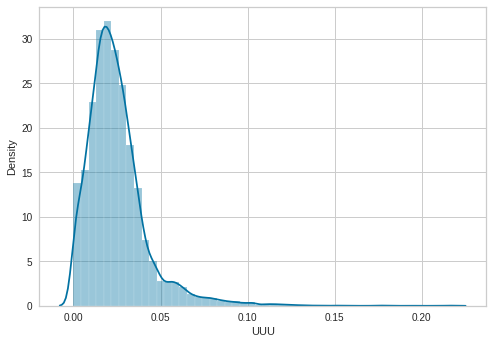

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


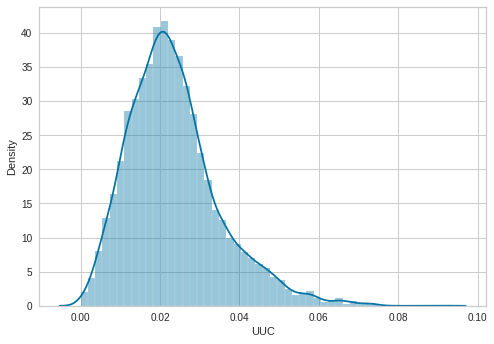

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


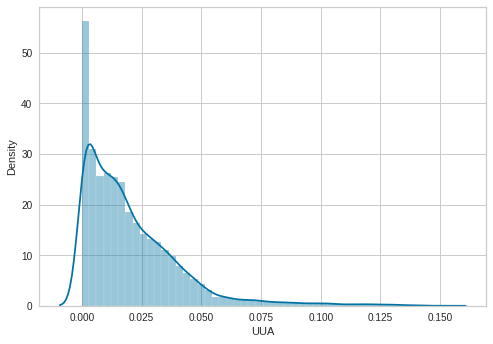

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


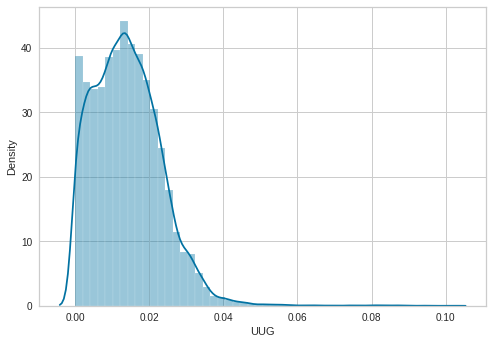

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


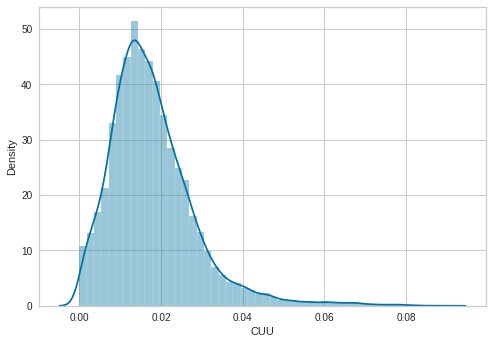

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


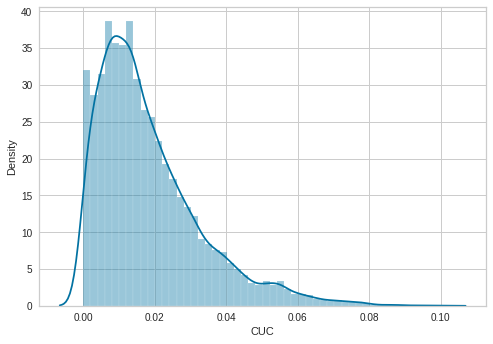

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


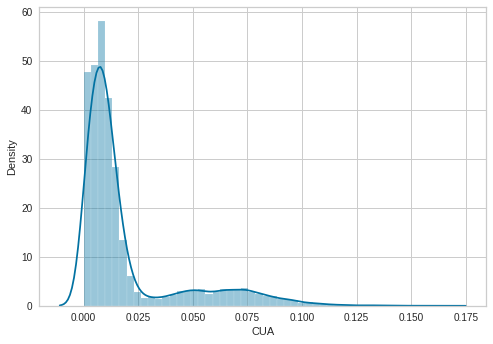

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


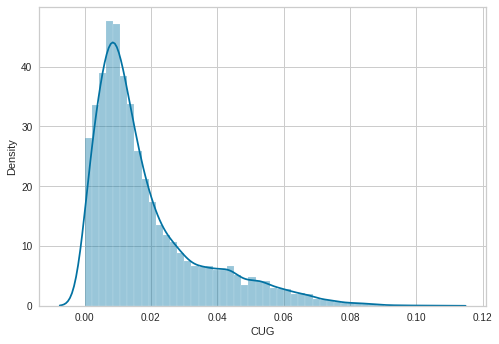

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


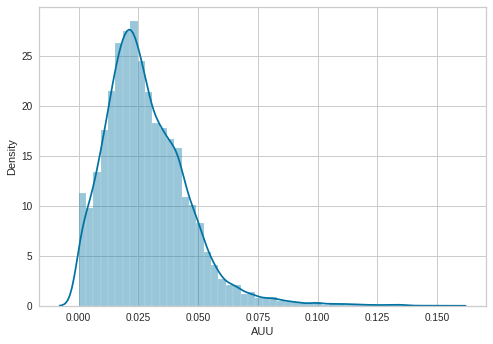

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


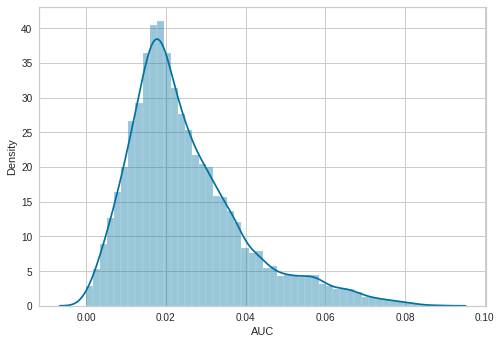

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


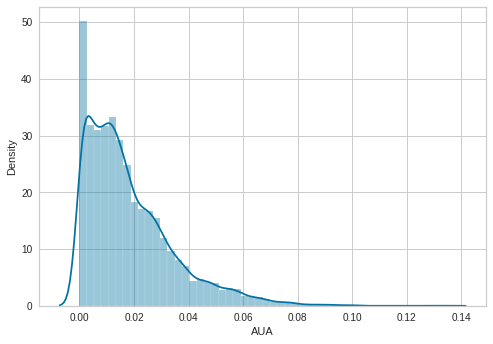

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


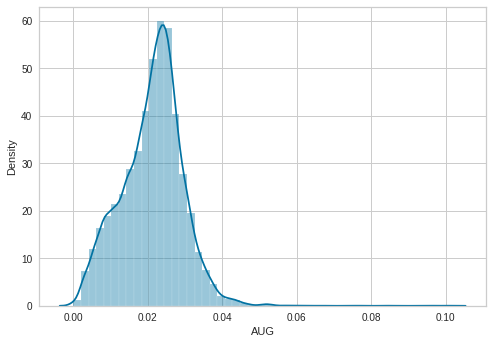

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


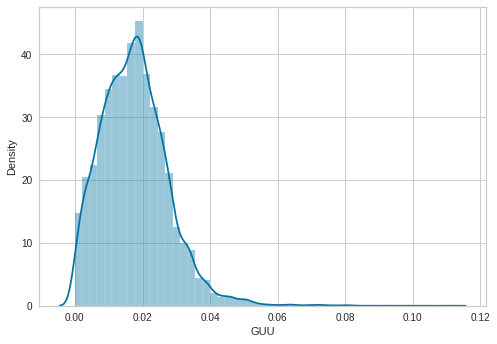

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


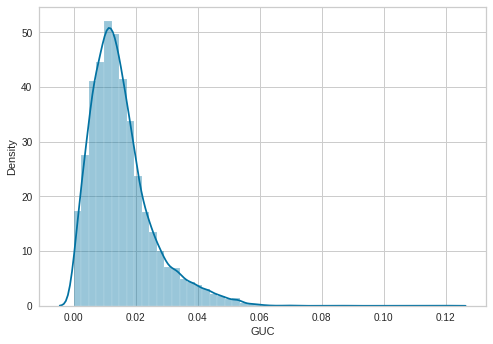

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


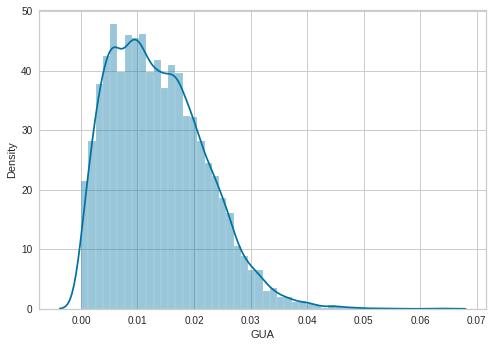

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


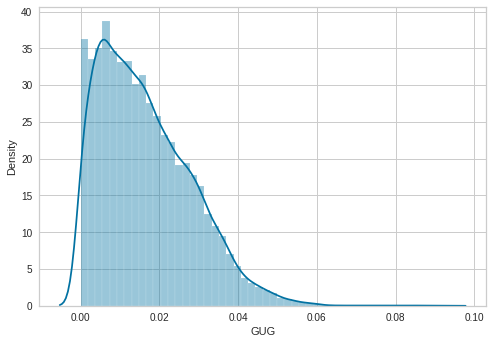

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


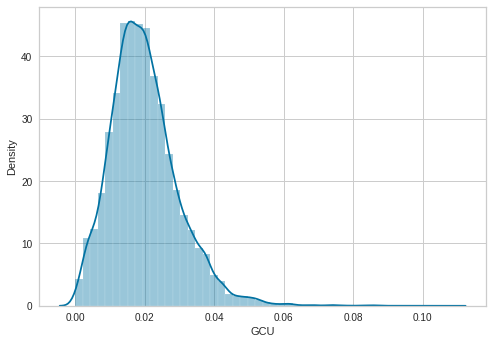

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


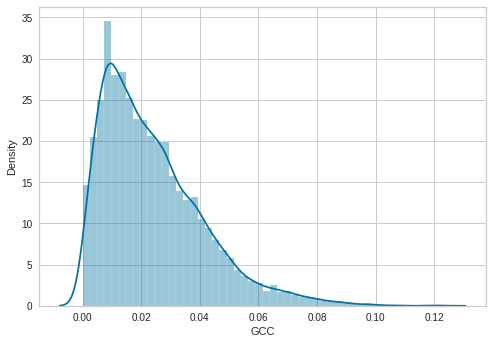

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


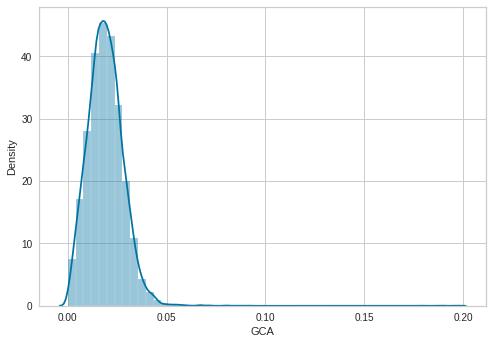

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


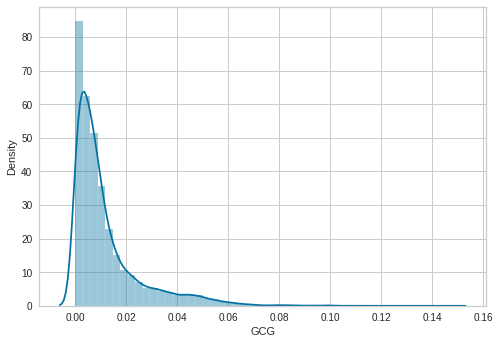

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


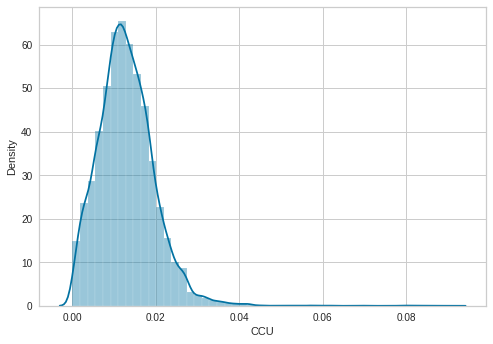

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


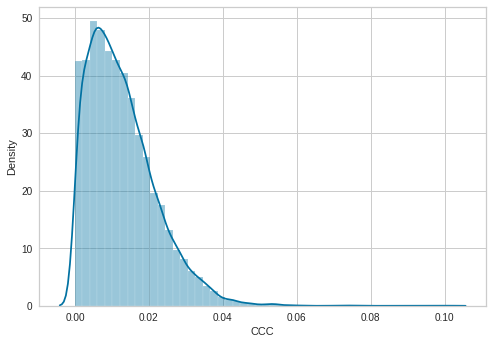

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


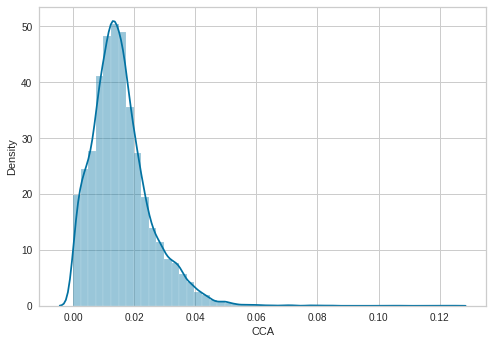

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


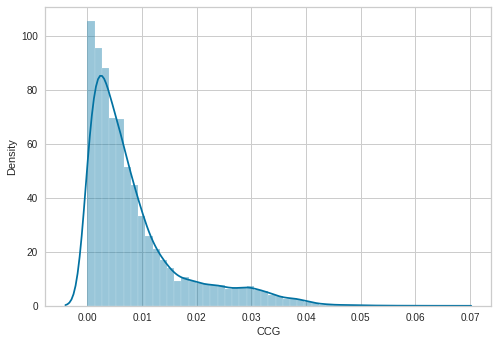

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


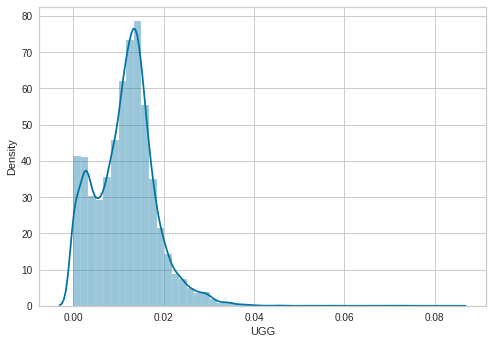

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


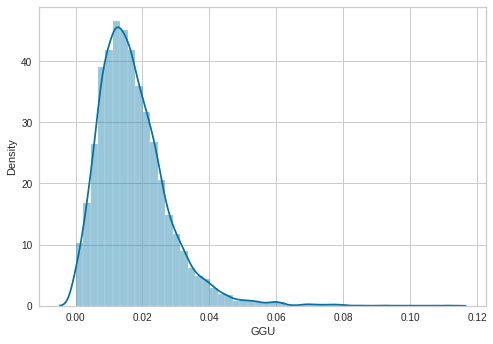

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


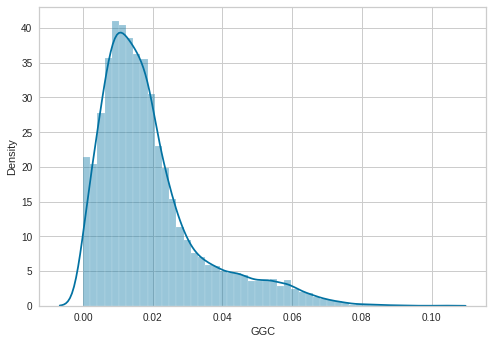

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


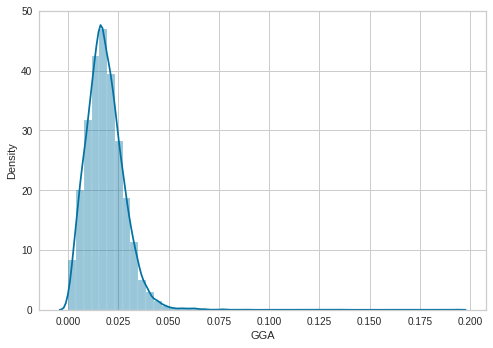

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


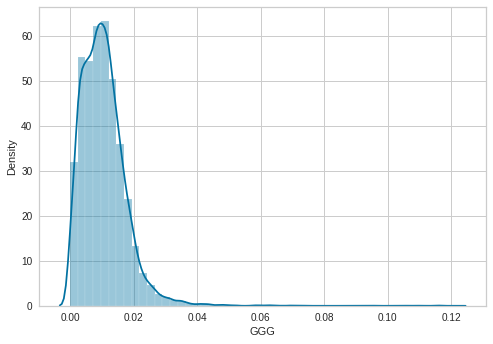

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


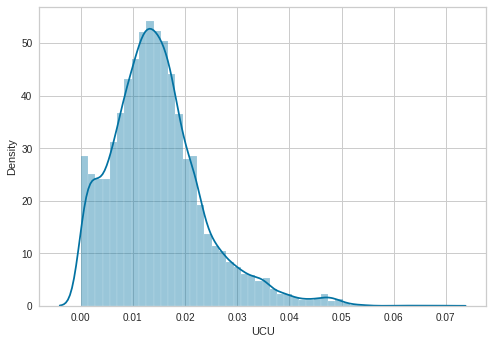

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


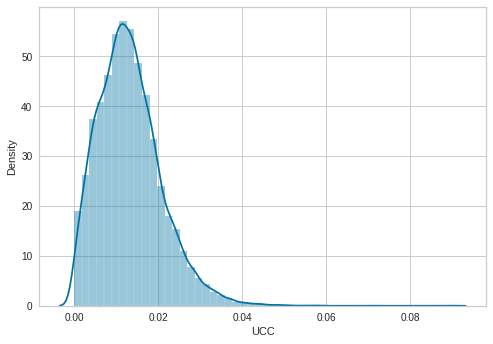

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


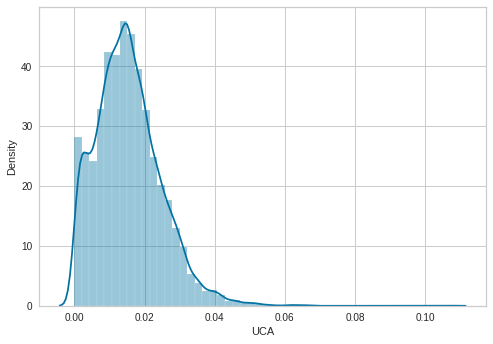

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


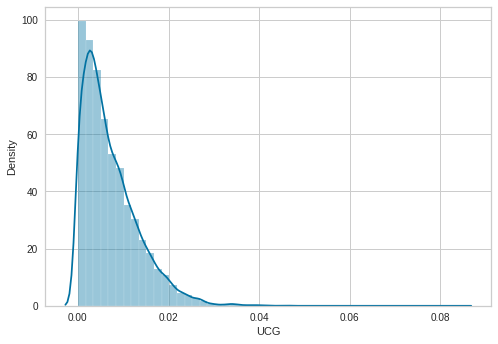

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


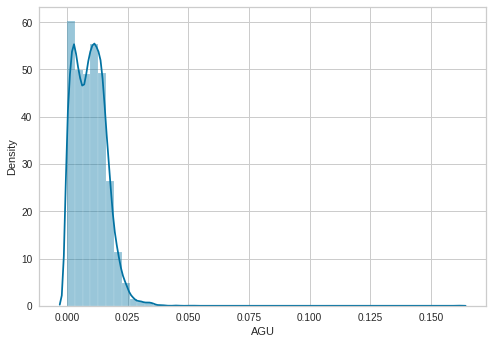

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


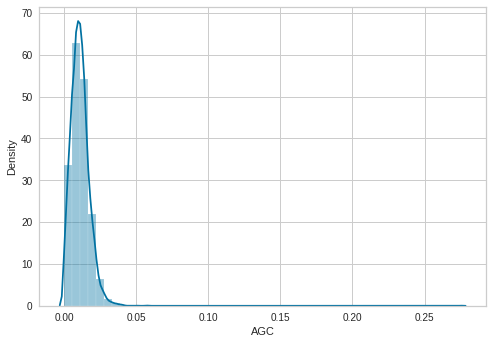

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


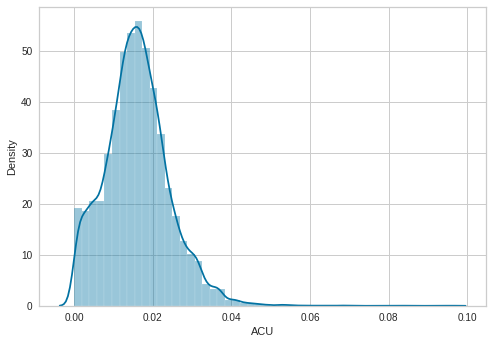

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


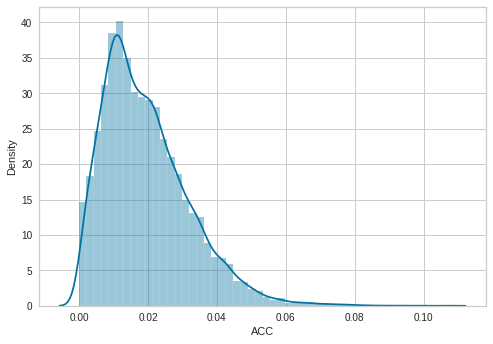

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


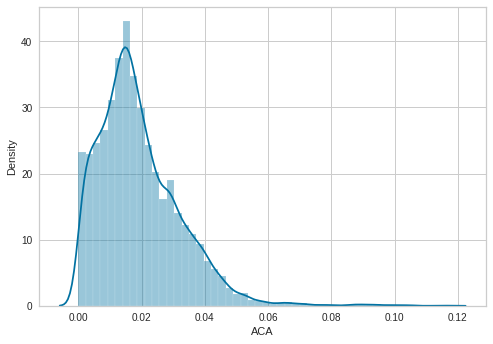

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


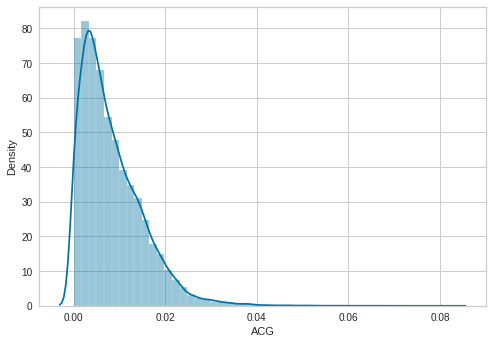

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


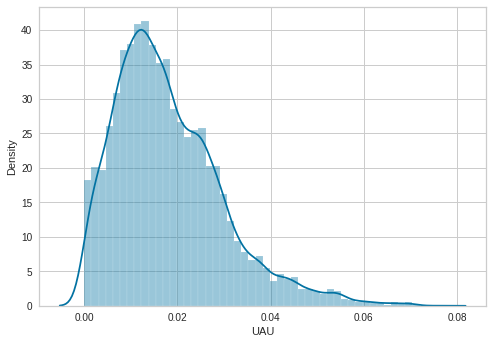

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


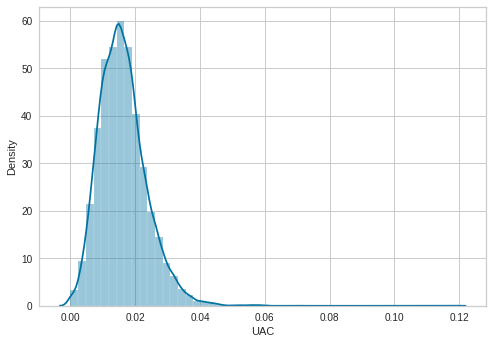

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


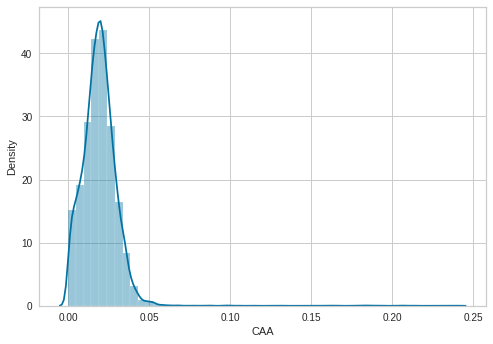

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


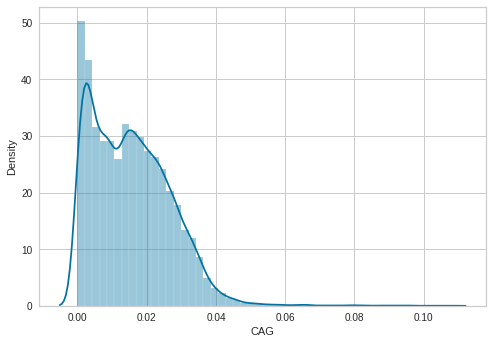

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


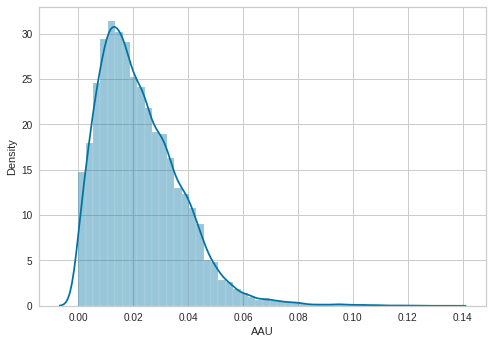

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


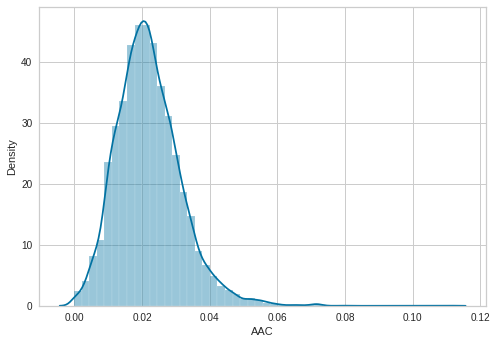

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


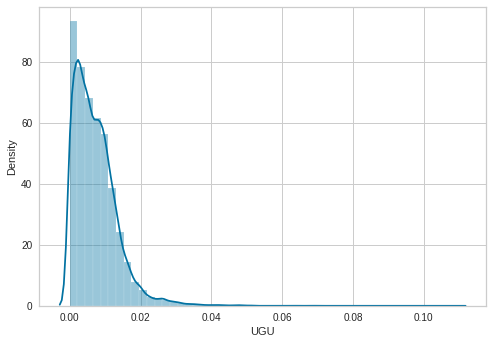

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


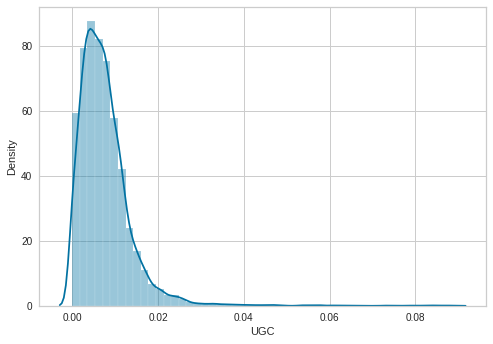

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


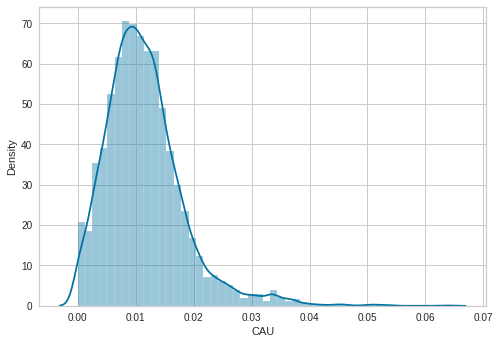

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


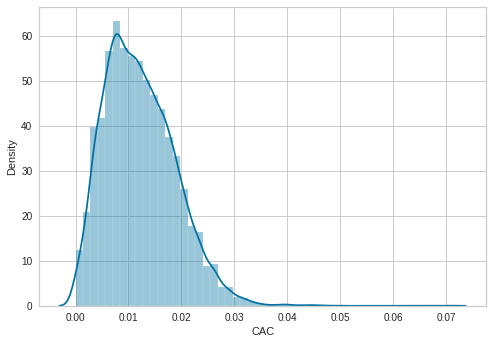

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


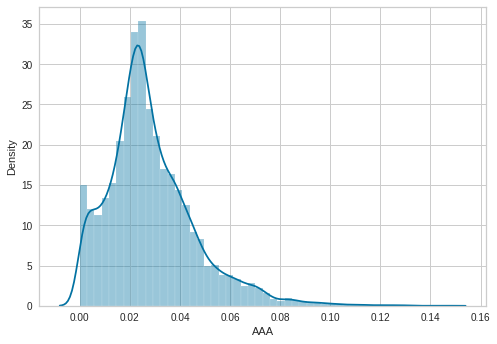

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


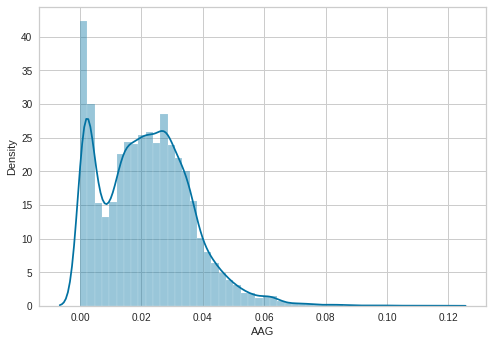

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


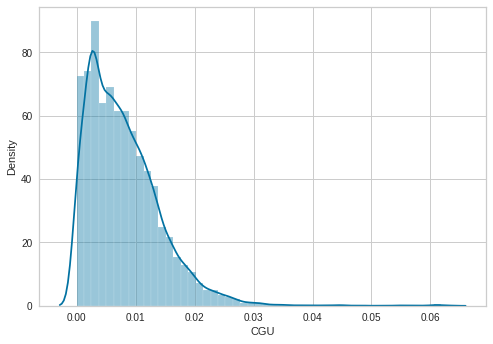

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


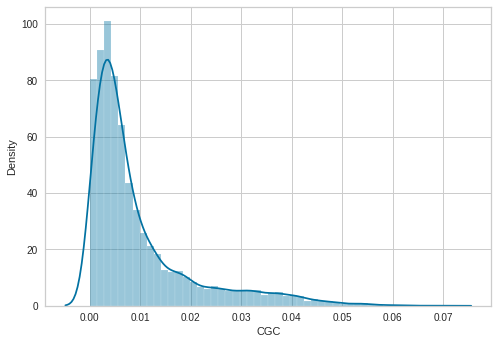

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


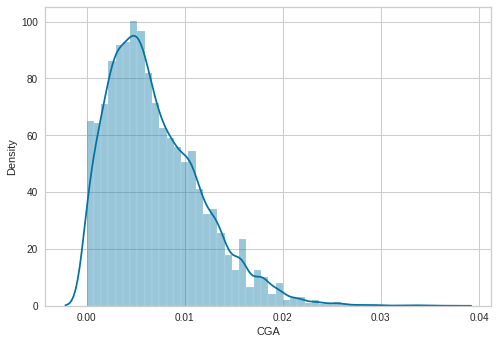

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


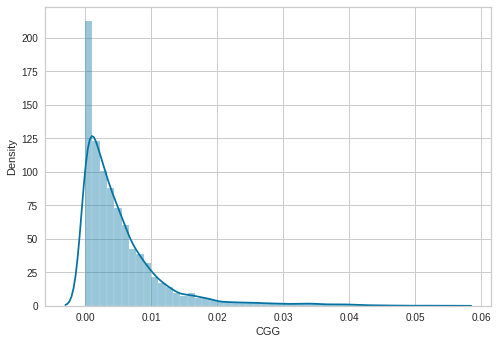

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


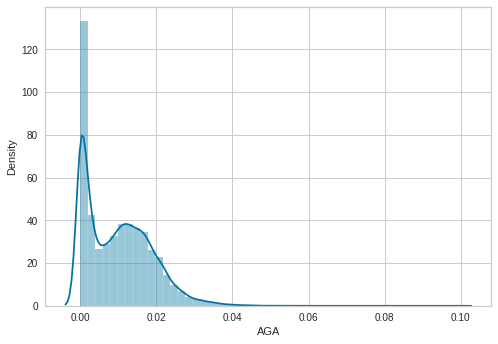

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


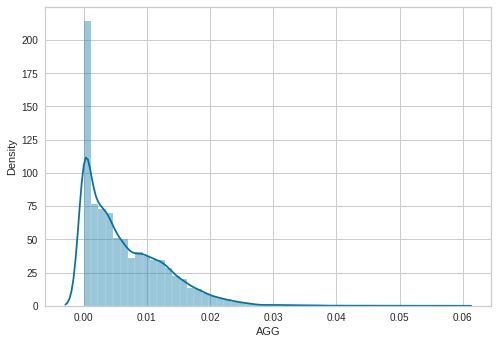

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


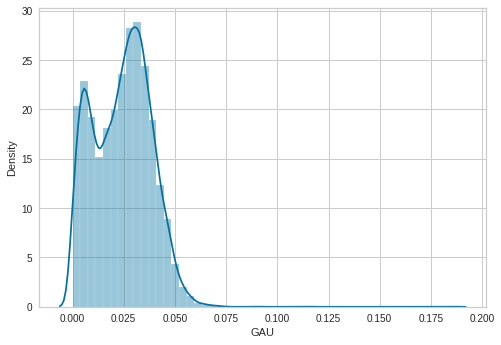

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


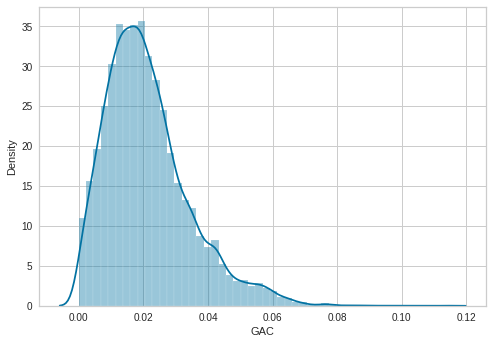

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


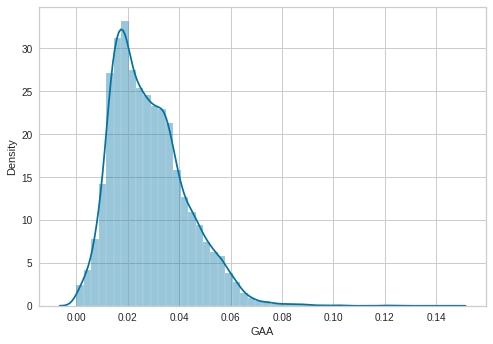

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


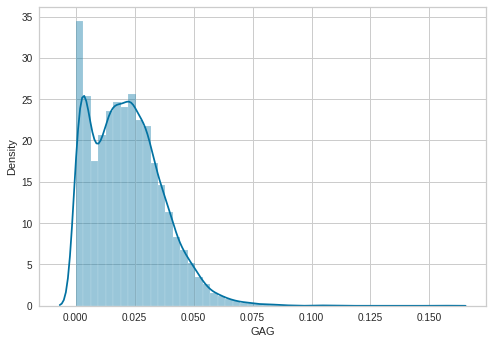

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


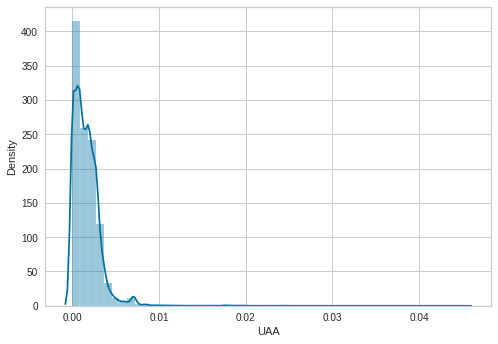

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


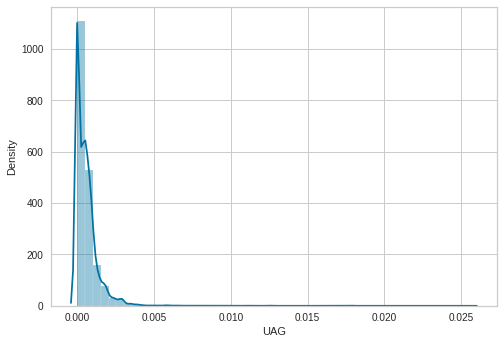

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


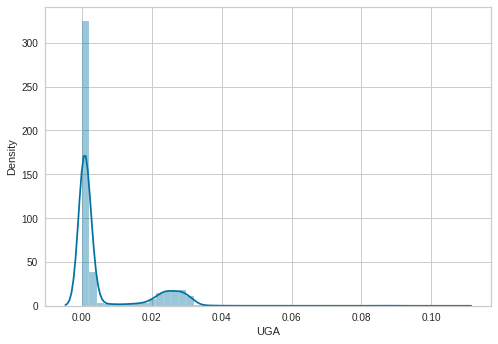

In [ ]:
#checking the distribution of variables
#specifying the columns/variables
num_columns = [col for col in X.columns]

#for loop to plot the distribution of all the 64 columns/variables specified in the input data
for col in num_columns:
    sns.distplot(X[col])
    plt.show()

# **Dimensionality reduction**

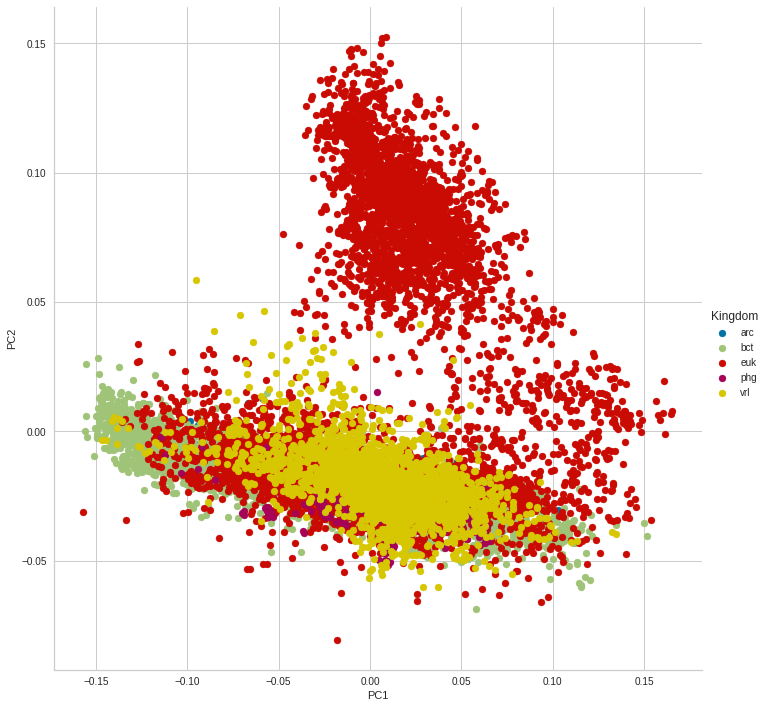

58.60533909147421


In [ ]:
#specifying the number of components to be kept in PCA
pca=PCA(n_components=2)


pca_X = pca.fit_transform(X)


# attaching the label for each data point and .T to exactly concatinate along axis
pca_XY = np.vstack((pca_X.T, Y)).T


#since pca_XY is a ndarray, convert it to dataframe as facegrid uses dataframe as parameter
pca_df = pd.DataFrame(data=pca_XY, columns=('PC1', 'PC2', 'Kingdom'))


#creat facegrids with columns and hue
graph = sns.FacetGrid(pca_df, hue='Kingdom', height=10)


#mapping the facegrid to attributes
graph.map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()


#variance explained by 2 components
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)


A visual 2D PCA resulted in capturing 58.6 % of variance using PC(1st principle component) and PC2(2nd principle component). However not much seperation was observed between the kingdoms using 2D PCA.

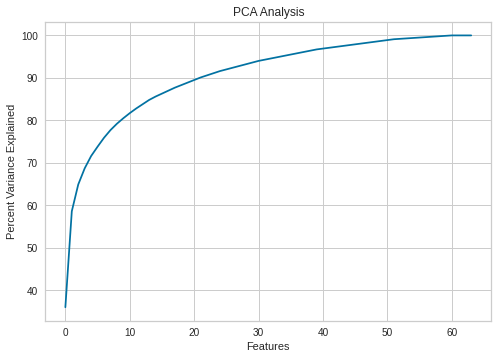

In [ ]:
# Non-visual dim reduction by PCA
#covariance matrix of 64 components
cov_matrix = PCA(n_components = 64)
cov_matrix.fit(X)


#calculate variance ratios
variance = cov_matrix.explained_variance_ratio_

#cumulative sum of variance explained with 64 features
cum_var=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)

#labelling axis and graph title
plt.ylabel('Percent Variance Explained')
plt.xlabel('Features')
plt.title('PCA Analysis')

plt.plot(cum_var)

PCA analysis shows that approximately 90% of variance is explained by 20 features. Further these 20 odd features can be extracted to train a model and compare it with the model trained using all the 64 features.

# **Initial profiling of dataset using Silhouette Plot KMeans Clustering**

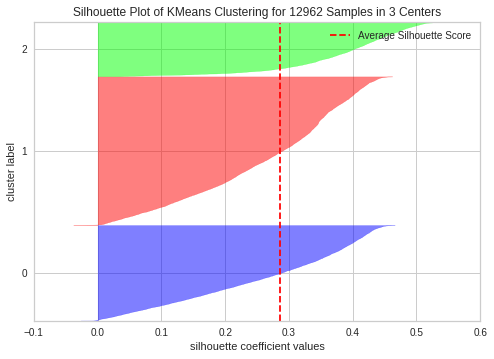

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c8116090>,
                     colors='brg',
                     estimator=KMeans(n_clusters=3, random_state=0))

In [ ]:
#KMeans silhouette score graph
silhouette_visualizer(KMeans(3, random_state=0), X, colors='brg')

Silhouette KMeans score was estimated for centers in the range of 3 to 11. The Silhouette KMeans score was highest for 3 centers, which is depicted in above graph. But a reasonable structure is said to be found if the Silhouette score is above 0.5

Thus the structure obtained above could be a weak and artificial one. Thus the results seem to be inconclusive.

### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
#splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

## **KNN model**

**Modelling and Error analysis**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

#Initializing the model
knn = KNeighborsClassifier(n_neighbors=13, metric='cosine')

#fitting model on D_train
knn.fit(X_train, Y_train)



#predicting test data
Y_Pred = knn.predict(X_test)

#predicting test probability
Y_Pred_Prob= knn.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)




#predicting train data
Y_Train_Pred = knn.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = knn.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of KNN is {train_logloss}")
print(f"Testing log_loss of KNN is {test_logloss}")


#finding accuracy scores of test and train
knn_train_acc = accuracy_score(Y_train, Y_Train_Pred)
knn_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of KNN is {knn_train_acc}")
print(f"Testing Accuracy of KNN is {knn_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))


#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of KNN is 0.11267616948079759
Testing log_loss of KNN is 0.2692472031885473
Training Accuracy of KNN is 0.9532259620021217
Testing Accuracy of KNN is 0.9436945622830698
              precision    recall  f1-score   support

         arc       0.91      0.69      0.78       105
         bct       0.93      0.96      0.94      2324
         euk       0.96      0.98      0.97      5458
         phg       0.91      0.69      0.78       185
         vrl       0.97      0.92      0.94      2297

    accuracy                           0.95     10369
   macro avg       0.94      0.85      0.88     10369
weighted avg       0.95      0.95      0.95     10369

              precision    recall  f1-score   support

         arc       0.80      0.57      0.67        21
         bct       0.93      0.95      0.94       593
         euk       0.96      0.97      0.96      1410
         phg       0.76      0.74      0.75        35
         vrl       0.94      0.90      0.92       534

**Hyper-parameter Tuning**

In [ ]:
#Tuning Hyperparameter 'k'
k_neighbors = list(range(3,31))


#Creat dictionary of hyperparameter
hyperparameter = dict(n_neighbors=k_neighbors)

#Create new KNN classifier
knn_2 = KNeighborsClassifier()

#Using GridSearch
CV = GridSearchCV(knn_2, hyperparameter, cv=5)

#Fit the best model
best_model = CV.fit(X_train, Y_train)

#Print The value of best Hyperparameter
print('Best k_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best k_neighbors: 3


**Model performance after hyper-parameter tuning**

In [ ]:
#Initializing the model
knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')

#fitting model on D_train
knn.fit(X_train, Y_train)



#predicting test data
Y_Pred = knn.predict(X_test)

#predicting test probability
Y_Pred_Prob= knn.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)




#predicting train data
Y_Train_Pred = knn.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = knn.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of KNN is {train_logloss}")
print(f"Testing log_loss of KNN is {test_logloss}")


#finding accuracy scores of test and train
knn_train_acc = accuracy_score(Y_train, Y_Train_Pred)
knn_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of KNN is {knn_train_acc}")
print(f"Testing Accuracy of KNN is {knn_test_acc}")


#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))


#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of KNN is 0.036373874309508135
Testing log_loss of KNN is 0.6156998709767645
Training Accuracy of KNN is 0.9817725913781464
Testing Accuracy of KNN is 0.9633629001156961
              precision    recall  f1-score   support

         arc       0.90      0.90      0.90       105
         bct       0.97      0.98      0.97      2324
         euk       0.99      0.99      0.99      5458
         phg       0.88      0.89      0.88       185
         vrl       0.99      0.97      0.98      2297

    accuracy                           0.98     10369
   macro avg       0.95      0.95      0.95     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.79      0.90      0.84        21
         bct       0.96      0.97      0.96       593
         euk       0.98      0.97      0.97      1410
         phg       0.72      0.89      0.79        35
         vrl       0.96      0.94      0.95       53

**Confusion matrix for KNN model**

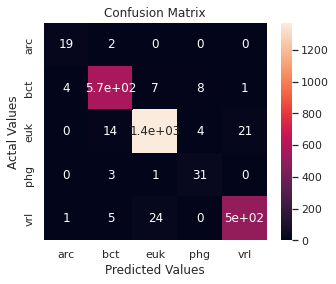

In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_Pred)

cm_df = pd.DataFrame(cm,
                     index = ['arc', 'bct', 'euk', 'phg', 'vrl'],
                     columns = ['arc', 'bct', 'euk', 'phg', 'vrl'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


## **Decision tree**

**Modelling and Error Analysis**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Initializing the model
dt = DecisionTreeClassifier(class_weight = 'balanced')

#fitting model on D_train
dt.fit(X_train, Y_train)



#predicting test data
Y_Pred = dt.predict(X_test)

#predicting test probability
Y_Pred_Prob= dt.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)




#predicting train data
Y_Train_Pred = knn.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = knn.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)




#printing train and test log loss
print(f"Training log_loss of Decision tree is {train_logloss}")
print(f"Testing log_loss of Decision tree is {test_logloss}")


#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)



#printing train and test accuracy
print(f"Training Accuracy of Decision tree is {dt_train_acc}")
print(f"Testing Accuracy of Decision tree is {dt_test_acc}")


#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))


#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Decision tree is 0.036373874309508135
Testing log_loss of Decision tree is 5.461202592330657
Training Accuracy of Decision tree is 0.9817725913781464
Testing Accuracy of Decision tree is 0.8418819899730042
              precision    recall  f1-score   support

         arc       0.90      0.90      0.90       105
         bct       0.97      0.98      0.97      2324
         euk       0.99      0.99      0.99      5458
         phg       0.88      0.89      0.88       185
         vrl       0.99      0.97      0.98      2297

    accuracy                           0.98     10369
   macro avg       0.95      0.95      0.95     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.44      0.52      0.48        21
         bct       0.82      0.85      0.83       593
         euk       0.89      0.87      0.88      1410
         phg       0.58      0.60      0.59        35
         vrl 

**Hyper-parameter Tuning**

In [ ]:
#tuning hyperparameter max_depth
#Creat dictionary of hyperparameter
grid_params = { 'max_depth' : [3, 5, 7, 9, 11, 13]}

#using grid search
grid_search = GridSearchCV(dt, grid_params, cv = 5)

#Initializing the model
dt = DecisionTreeClassifier(class_weight = 'balanced')

#fit the best model
grid_search.fit(X_train, Y_train)

#print value of best hyperparameter
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 13}
0.8309376513291848


**Decision tree after fine tuning hyperparameter**

In [ ]:
#Initializing the model
dt = DecisionTreeClassifier(max_depth = 13)

#fitting model on D_train
dt.fit(X_train, Y_train)



#predicting test data
Y_Pred = dt.predict(X_test)

#predicting test probability
Y_Pred_Prob= dt.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)




#predicting train data
Y_Train_Pred = knn.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = knn.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)




#printing train and test log loss
print(f"Training log_loss of Decision tree is {train_logloss}")
print(f"Testing log_loss of Decision tree is {test_logloss}")


#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)



#printing train and test accuracy
print(f"Training Accuracy of Decision tree is {dt_train_acc}")
print(f"Testing Accuracy of Decision tree is {dt_test_acc}")


#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))


#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Decision tree is 0.036373874309508135
Testing log_loss of Decision tree is 4.258163521245557
Training Accuracy of Decision tree is 0.9817725913781464
Testing Accuracy of Decision tree is 0.8484381025838796
              precision    recall  f1-score   support

         arc       0.90      0.90      0.90       105
         bct       0.97      0.98      0.97      2324
         euk       0.99      0.99      0.99      5458
         phg       0.88      0.89      0.88       185
         vrl       0.99      0.97      0.98      2297

    accuracy                           0.98     10369
   macro avg       0.95      0.95      0.95     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.45      0.48      0.47        21
         bct       0.84      0.84      0.84       593
         euk       0.89      0.89      0.89      1410
         phg       0.36      0.40      0.38        35
         vrl 

**Confusion matrix for decision tree model**

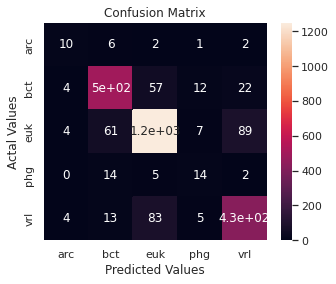

In [ ]:
cm=confusion_matrix(Y_test, Y_Pred)

cm_df = pd.DataFrame(cm,
                     index = ['arc', 'bct', 'euk', 'phg', 'vrl'],
                     columns = ['arc', 'bct', 'euk', 'phg', 'vrl'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


## **Random Forest Classifier**

**Modelling and Error Analysis**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Initializing the model
RFC = RandomForestClassifier(n_estimators = 200, class_weight='balanced')

#fitting model on D_train
RFC.fit(X_train, Y_train)



#predicting test data
Y_Pred = dt.predict(X_test)

#predicting test probability
Y_Pred_Prob= RFC.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)




#predicting train data
Y_Train_Pred = RFC.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = RFC.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)




#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of Random Forest is {dt_train_acc}")
print(f"Testing Accuracy of Random Forest is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Random Forest is 0.07673992205424611
Testing log_loss of Random Forest is 0.27449765928073405
Training Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 0.8484381025838796
              precision    recall  f1-score   support

         arc       1.00      1.00      1.00       105
         bct       1.00      1.00      1.00      2324
         euk       1.00      1.00      1.00      5458
         phg       1.00      1.00      1.00       185
         vrl       1.00      1.00      1.00      2297

    accuracy                           1.00     10369
   macro avg       1.00      1.00      1.00     10369
weighted avg       1.00      1.00      1.00     10369

              precision    recall  f1-score   support

         arc       0.45      0.48      0.47        21
         bct       0.84      0.84      0.84       593
         euk       0.89      0.89      0.89      1410
         phg       0.36      0.40      0.38        35
         vrl       0.79    

**Tuning hyperparameter max_depth and n_parameters**

In [ ]:
#tuning hyperparameter max_depth and n_parameters
#Creat dictionary of hyperparameter
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth': [3, 5, 7, 9, 11, 13], 'n_estimators': [10, 25, 50, 100, 150, 300]}

#Initializing the model
RFC = RandomForestClassifier(class_weight='balanced')

#using grid search
grid_search = RandomizedSearchCV(estimator = RFC, param_distributions = param_grid, cv = 5, n_iter = 10)

#fit the best model
grid_search.fit(X_train, Y_train)

#print value of best hyperparameter
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 100, 'max_depth': 11}
0.9290197101829512


**Random forest after fine tuning**

In [ ]:
#Random Forest after fine tuning
RFC = RandomForestClassifier(n_estimators = 100, max_depth=11, class_weight='balanced')

#fitting model on D_train
RFC.fit(X_train, Y_train)



#predicting test data
Y_Pred = dt.predict(X_test)

#predicting test probability
Y_Pred_Prob= RFC.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)



#predicting train data
Y_Train_Pred = RFC.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = RFC.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of Random Forest is {dt_train_acc}")
print(f"Testing Accuracy of Random Forest is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Random Forest is 0.21220802209295625
Testing log_loss of Random Forest is 0.33600669292215896
Training Accuracy of Random Forest is 0.9834120937409586
Testing Accuracy of Random Forest is 0.8484381025838796
              precision    recall  f1-score   support

         arc       0.94      1.00      0.97       105
         bct       0.99      0.99      0.99      2324
         euk       1.00      0.97      0.99      5458
         phg       0.96      1.00      0.98       185
         vrl       0.94      1.00      0.97      2297

    accuracy                           0.98     10369
   macro avg       0.97      0.99      0.98     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.45      0.48      0.47        21
         bct       0.84      0.84      0.84       593
         euk       0.89      0.89      0.89      1410
         phg       0.36      0.40      0.38        35
         vrl

**Confsion matrix for Random Forest model**

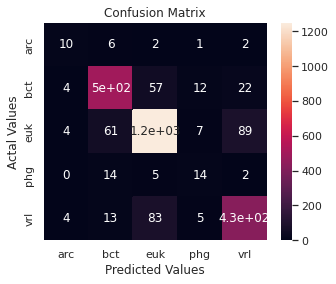

In [ ]:
cm=confusion_matrix(Y_test, Y_Pred)

cm_df = pd.DataFrame(cm,
                     index = ['arc', 'bct', 'euk', 'phg', 'vrl'],
                     columns = ['arc', 'bct', 'euk', 'phg', 'vrl'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


## **Gradient Boosting**

**Modelling and Error Analysis**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Initializing the model
GBC = GradientBoostingClassifier()

#fitting model on D_train
GBC.fit(X_train, Y_train)



#predicting test data
Y_Pred = GBC.predict(X_test)

#predicting test probability
Y_Pred_Prob= GBC.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)



#predicting train data
Y_Train_Pred = GBC.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = GBC.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of Random Forest is {dt_train_acc}")
print(f"Testing Accuracy of Random Forest is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Random Forest is 0.11414249706764994
Testing log_loss of Random Forest is 0.20245859597106192
Training Accuracy of Random Forest is 0.9779149387597647
Testing Accuracy of Random Forest is 0.9348245275742383
              precision    recall  f1-score   support

         arc       1.00      0.97      0.99       105
         bct       0.98      0.98      0.98      2324
         euk       0.98      0.98      0.98      5458
         phg       0.99      0.91      0.95       185
         vrl       0.97      0.97      0.97      2297

    accuracy                           0.98     10369
   macro avg       0.98      0.96      0.97     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.86      0.57      0.69        21
         bct       0.94      0.93      0.94       593
         euk       0.94      0.96      0.95      1410
         phg       0.74      0.66      0.70        35
         vrl

**Tuning hyperparameters n_estimator, max_depth and leaning_rate**

In [ ]:
#tuning hyperparameters n_estimator, max_depth, leaning_rate
#Creat dictionary of hyperparameters
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"n_estimators":[25, 50, 100, 200, 300],"max_depth":[3, 5, 7, 9, 11, 13], "learning_rate":[0.01,0.1,1,10]}

#using grid search
grid_search = RandomizedSearchCV(estimator = GBC, param_distributions=param_grid, cv = 5, n_iter=5)

#fit the best model
grid_search.fit(X_train, Y_train)

#print value of best hyperparameters
print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}
0.9297910732701897


**Model performance after hyper-parameter tuning**

In [ ]:
#Initializing the model
GBC = GradientBoostingClassifier(n_estimators=300, max_depth=5, learning_rate=0.01)

#fitting model on D_train
GBC.fit(X_train, Y_train)



#predicting test data
Y_Pred = GBC.predict(X_test)

#predicting test probability
Y_Pred_Prob= GBC.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)



#predicting train data
Y_Train_Pred = GBC.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = GBC.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of Random Forest is {dt_train_acc}")
print(f"Testing Accuracy of Random Forest is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Random Forest is 0.1411681376992562
Testing log_loss of Random Forest is 0.23811612319276437
Training Accuracy of Random Forest is 0.9792651171761982
Testing Accuracy of Random Forest is 0.9290397223293483
              precision    recall  f1-score   support

         arc       1.00      0.85      0.92       105
         bct       0.98      0.98      0.98      2324
         euk       0.98      0.99      0.98      5458
         phg       0.99      0.89      0.93       185
         vrl       0.98      0.97      0.97      2297

    accuracy                           0.98     10369
   macro avg       0.98      0.93      0.96     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.90      0.43      0.58        21
         bct       0.93      0.92      0.93       593
         euk       0.94      0.96      0.95      1410
         phg       0.85      0.63      0.72        35
         vrl 

In [ ]:
#Initializing the model
GBC = GradientBoostingClassifier(n_estimators=200, max_depth=11, learning_rate=0.1)

#fitting model on D_train
GBC.fit(X_train, Y_train)



#predicting test data
Y_Pred = GBC.predict(X_test)

#predicting test probability
Y_Pred_Prob= GBC.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)



#predicting train data
Y_Train_Pred = GBC.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = GBC.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of Random Forest is {dt_train_acc}")
print(f"Testing Accuracy of Random Forest is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Random Forest is 1.2046946081205174e-08
Testing log_loss of Random Forest is 0.2414852048468337
Training Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 0.9444658696490551
              precision    recall  f1-score   support

         arc       1.00      1.00      1.00       105
         bct       1.00      1.00      1.00      2324
         euk       1.00      1.00      1.00      5458
         phg       1.00      1.00      1.00       185
         vrl       1.00      1.00      1.00      2297

    accuracy                           1.00     10369
   macro avg       1.00      1.00      1.00     10369
weighted avg       1.00      1.00      1.00     10369

              precision    recall  f1-score   support

         arc       0.86      0.57      0.69        21
         bct       0.94      0.94      0.94       593
         euk       0.95      0.97      0.96      1410
         phg       0.79      0.63      0.70        35
         vrl       0.93  

**Confusion matrix for Gradient Boosting model**

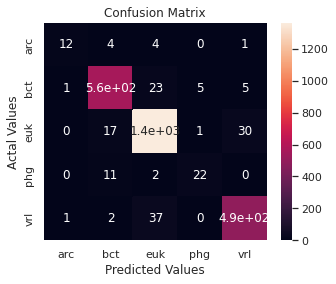

In [ ]:
cm=confusion_matrix(Y_test, Y_Pred)

cm_df = pd.DataFrame(cm,
                     index = ['arc', 'bct', 'euk', 'phg', 'vrl'],
                     columns = ['arc', 'bct', 'euk', 'phg', 'vrl'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# **Gaussian Naive Bayes**

**Modelling and error analysis**

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Initializing the model
GNB = GaussianNB()

#fitting model on D_train
GNB.fit(X_train, Y_train)



#predicting test data
Y_Pred = GNB.predict(X_test)

#predicting test probability
Y_Pred_Prob= GNB.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)



#predicting train data
Y_Train_Pred = GNB.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = GNB.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of GaussianNB is {dt_train_acc}")
print(f"Testing Accuracy of GaussianNB is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training log_loss of Random Forest is 4.899274220445985
Testing log_loss of Random Forest is 4.83064579187236
Training Accuracy of GaussianNB is 0.6357411515093065
Testing Accuracy of GaussianNB is 0.6347859622059391
              precision    recall  f1-score   support

         arc       0.31      0.62      0.41       105
         bct       0.62      0.53      0.57      2324
         euk       0.92      0.58      0.71      5458
         phg       0.17      0.76      0.27       185
         vrl       0.51      0.87      0.64      2297

    accuracy                           0.64     10369
   macro avg       0.51      0.67      0.52     10369
weighted avg       0.74      0.64      0.65     10369

              precision    recall  f1-score   support

         arc       0.32      0.67      0.43        21
         bct       0.64      0.57      0.60       593
         euk       0.93      0.57      0.71      1410
         phg       0.14      0.74      0.23        35
         vrl       0.48

**Tuning Naive Bayes**

In [ ]:
clf = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=clf,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, Y_train)

gs_NB.best_params_
gs_NB.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.6356452362444824

**Naive Bayes after var_smoothing**

In [ ]:
#fitting model on D_train
gs_NB.fit(X_train, Y_train)



#predicting test data
Y_Pred = gs_NB.predict(X_test)

#predicting test probability
Y_Pred_Prob= gs_NB.predict_proba(X_test)

#log loss of the test data
test_logloss = log_loss(Y_test, Y_Pred_Prob)



#predicting train data
Y_Train_Pred = gs_NB.predict(X_train)

#predicting train probability
Y_Train_Pred_Prob = gs_NB.predict_proba(X_train)

#log loss of the train data
train_logloss = log_loss(Y_train, Y_Train_Pred_Prob)



#printing train and test log loss
print(f"Training log_loss of Random Forest is {train_logloss}")
print(f"Testing log_loss of Random Forest is {test_logloss}")



#finding accuracy scores of test and train
dt_train_acc = accuracy_score(Y_train, Y_Train_Pred)
dt_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of GaussianNB is {dt_train_acc}")
print(f"Testing Accuracy of GaussianNB is {dt_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))



#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training log_loss of Random Forest is 4.8992797181347125
Testing log_loss of Random Forest is 4.830714195242432
Training Accuracy of GaussianNB is 0.635644710193847
Testing Accuracy of GaussianNB is 0.6347859622059391
              precision    recall  f1-score   support

         arc       0.31      0.62      0.41       105
         bct       0.63      0.53      0.57      2324
         euk       0.92      0.58      0.71      5458
         phg       0.17      0.76      0.27       185
         vrl       0.51      0.87      0.64      2297

    accuracy                           0.64     10369
   macro avg       0.51      0.67      0.52     10369
weighted avg       0.74      0.64      0.65     10369

              precision    recall  f1-score   support

         arc       0.32      0.67      0.43        21
         bct       0.64      0.57      0.60       593
         euk       0.93      0.57      0.71      1410
         phg 

**Confusion matrix for Gaussian Naive base model**

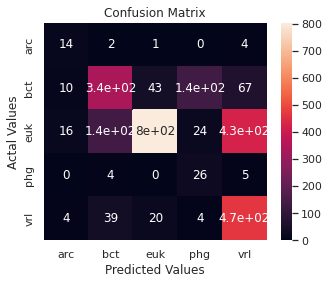

In [ ]:
cm=confusion_matrix(Y_test, Y_Pred)

cm_df = pd.DataFrame(cm,
                     index = ['arc', 'bct', 'euk', 'phg', 'vrl'],
                     columns = ['arc', 'bct', 'euk', 'phg', 'vrl'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# **Kernel SVM Model**

In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC


#Initializing the model
svm = SVC(kernel = 'rbf')

#fitting model on D_train
svm.fit(X_train,Y_train)

#predicting test data
Y_Pred = svm.predict(X_test)


#predicting train data
Y_Train_Pred = svm.predict(X_train)


#finding accuracy scores of test and train
svm_train_acc = accuracy_score(Y_train, Y_Train_Pred)
svm_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of svm is {knn_train_acc}")
print(f"Testing Accuracy of svm is {knn_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))


#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training Accuracy of svm is 0.9817725913781464
Testing Accuracy of svm is 0.9633629001156961
              precision    recall  f1-score   support

         arc       0.93      0.73      0.82       105
         bct       0.95      0.98      0.97      2324
         euk       0.98      0.98      0.98      5458
         phg       0.97      0.59      0.74       185
         vrl       0.95      0.96      0.96      2297

    accuracy                           0.97     10369
   macro avg       0.96      0.85      0.89     10369
weighted avg       0.97      0.97      0.97     10369

              precision    recall  f1-score   support

         arc       0.88      0.67      0.76        21
         bct       0.93      0.97      0.95       593
         euk       0.97      0.96      0.97      1410
         phg       0.81      0.49      0.61        35
         vrl       0.92      0.94      0.93       534

    accuracy                           0.95      2593
   macro avg       0.90      0.80     

In [ ]:
#tuning hyperparameters C, gamma
#Creat dictionary of hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}


#using grid search
grid_search = GridSearchCV (svm, param_grid, cv = 5)

#fit the best model
grid_search.fit(X_train, Y_train)

#print value of best hyperparameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kernel': 'poly'}
0.9595908454245498


In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC


#Initializing the model
svm = SVC(kernel = 'poly')

#fitting model on D_train
svm.fit(X_train,Y_train)

#predicting test data
Y_Pred = svm.predict(X_test)


#predicting train data
Y_Train_Pred = svm.predict(X_train)



#finding accuracy scores of test and train
svm_train_acc = accuracy_score(Y_train, Y_Train_Pred)
svm_test_acc = accuracy_score(Y_test, Y_Pred)

#printing train and test accuracy
print(f"Training Accuracy of svm is {knn_train_acc}")
print(f"Testing Accuracy of svm is {knn_test_acc}")



#classification report of train and test
print(classification_report(Y_train, Y_Train_Pred))
print(classification_report(Y_test, Y_Pred))


#matthew's correlation for train and test
print(f" training matthew's correlation coefficient {matthews_corrcoef(Y_train, Y_Train_Pred)}")
print(f" test matthew's correlation coefficient {matthews_corrcoef(Y_test, Y_Pred)}")

Training Accuracy of svm is 0.9817725913781464
Testing Accuracy of svm is 0.9633629001156961
              precision    recall  f1-score   support

         arc       0.98      0.94      0.96       105
         bct       0.98      0.99      0.98      2324
         euk       0.99      0.99      0.99      5458
         phg       0.92      0.86      0.89       185
         vrl       0.97      0.98      0.98      2297

    accuracy                           0.98     10369
   macro avg       0.97      0.95      0.96     10369
weighted avg       0.98      0.98      0.98     10369

              precision    recall  f1-score   support

         arc       0.86      0.90      0.88        21
         bct       0.95      0.97      0.96       593
         euk       0.98      0.96      0.97      1410
         phg       0.78      0.80      0.79        35
         vrl       0.93      0.95      0.94       534

    accuracy                           0.96      2593
   macro avg       0.90      0.92     

**Confusion matrix for Kernal SVM model**

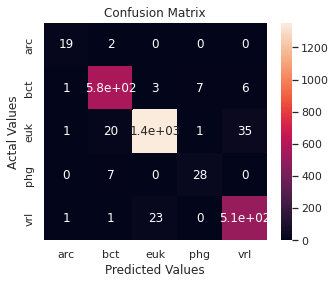

In [ ]:
cm=confusion_matrix(Y_test, Y_Pred)

cm_df = pd.DataFrame(cm,
                     index = ['arc', 'bct', 'euk', 'phg', 'vrl'],
                     columns = ['arc', 'bct', 'euk', 'phg', 'vrl'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# **t-SNE**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10369 samples in 0.002s...
[t-SNE] Computed neighbors for 10369 samples in 3.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10369
[t-SNE] Computed conditional probabilities for sample 2000 / 10369
[t-SNE] Computed conditional probabilities for sample 3000 / 10369
[t-SNE] Computed conditional probabilities for sample 4000 / 10369
[t-SNE] Computed conditional probabilities for sample 5000 / 10369
[t-SNE] Computed conditional probabilities for sample 6000 / 10369
[t-SNE] Computed conditional probabilities for sample 7000 / 10369
[t-SNE] Computed conditional probabilities for sample 8000 / 10369
[t-SNE] Computed conditional probabilities for sample 9000 / 10369
[t-SNE] Computed conditional probabilities for sample 10000 / 10369
[t-SNE] Computed conditional probabilities for sample 10369 / 10369
[t-SNE] Mean sigma: 0.011091
[t-SNE] Computed conditional probabilities in 0.439s
[t-SNE] Iteration 50: error = 100.84

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


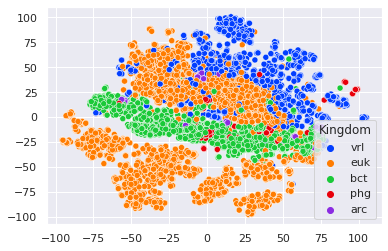

In [ ]:
from sklearn.manifold import TSNE
Xreduced=TSNE(verbose=2, perplexity=20).fit_transform(X_train)

#For plotting
sns.scatterplot(Xreduced[:,0], Xreduced[:,1], hue=Y_train, legend='full', palette=sns.color_palette("bright", 5))
